# Análise do Negócio
- O objetivo desse projeto é analisar todas os resultados e informações de uma empresa focada em estética automotiva.

- Os dados foram coletados a partir do sistema CRM que foi implementado recentemente.

- A quantidade de dados ainda é baixa, mas já é possível realizar análises poderosas e observar as tendências.
#### *A utilização dos dados foi autorizada pelos responsáveis.

## Importando as Bibliotecas

In [2]:
import pandas as pd
import seaborn as srn
import matplotlib.pyplot as plt

## Importando os Dados

In [3]:
dados = pd.read_csv("TR Estética Automotiva - Cliente.csv", 
          sep = ",", 
          parse_dates = ["Data Atendimento", "Data Fechamento", "Data Referência Fechamento"], 
          dayfirst = False)

#Visulizando
dados.head()

,ID,Nome,Responsável,Origem,Temperatura,Situação,Observações,Data Atendimento,Data Fechamento,Data Referência Fechamento,Data Referência
0,345zYB2RStaeNDSoFPrKCQ,Tintin,Victor,Outros,Quente,FECHADO,Fechadura do porta malas com defeito ( fechar ...,2022-07-20,2022-07-20,2022-07-20,7.0
1,kodJrgZQQbOYocrI4wEXug,Victor Luiz,Victor,Outros,Quente,FECHADO,Ter cuidado com os botões no painel ( descarre...,2022-07-20,2022-07-29,2022-07-29,7.0
2,9XlS0WWDTQ6xUnyp3EcXyg,Wesley,Victor,Indicação,Quente,FECHADO,40,2022-07-21,2022-07-21,2022-07-21,7.0
3,a-ihIurH5Q9ipdAPzY3AeBw,Diogo,Victor,Outros,Quente,FECHADO,NaN,2022-07-21,2022-07-21,2022-07-21,7.0
4,EnbNzP.8Qs-K3r-gQI3IOQ,Rubem Borges,Victor,Outros,Quente,FECHADO,Serviço de permuta,2022-07-21,2022-07-21,2022-07-21,7.0


## Excluindo Linhas Nulas

In [ ]:
dados.dropna(how='all')

## Tamanho dos Dados

In [101]:
dados.shape
# Nº de Linhas e Colunas

(49, 11)

## Verificando os Tipos de Dados

In [102]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ID                          47 non-null     object        
 1   Nome                        47 non-null     object        
 2   Responsável                 47 non-null     object        
 3   Origem                      47 non-null     object        
 4   Temperatura                 47 non-null     object        
 5   Situação                    47 non-null     object        
 6   Observações                 7 non-null      object        
 7   Data Atendimento            47 non-null     datetime64[ns]
 8   Data Fechamento             44 non-null     datetime64[ns]
 9   Data Referência Fechamento  45 non-null     datetime64[ns]
 10  Data Referência             47 non-null     float64       
dtypes: datetime64[ns](3), float64(1), object(7)
memory usage: 4.

# Dados Categóricos

In [10]:
# Origem
agrupado = dados.groupby(['Origem']).size()
agrupado

Origem
Indicação     11
Instagram      1
Outros        29
Recorrente     6
dtype: int64

In [11]:
# Temperatura
agrupado = dados.groupby(['Temperatura']).size()
agrupado

Temperatura
Quente    47
dtype: int64

In [12]:
# Situação
agrupado = dados.groupby(['Situação']).size()
agrupado

Situação
EM ABERTO     3
FECHADO      44
dtype: int64

In [13]:
# Responsável
agrupado = dados.groupby(['Responsável']).size()
agrupado

Responsável
Gabriel    18
Victor     29
dtype: int64

# Key Perfomance Indicator (KPI)

## Origem dos Leads
Quais são os canais mais utilizados pelos Leads para encontrarem a loja?

Text(0, 0.5, 'Origem')

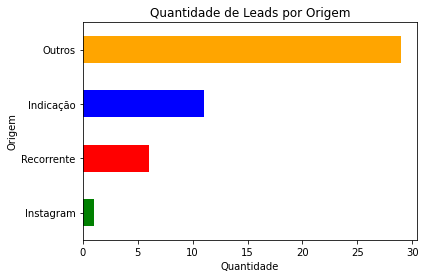

In [40]:
agrupado = dados.groupby(['Origem']).size()
agrupado = agrupado.sort_values()
agrupado.plot.barh(color=['green', 'red', 'blue', 'orange'])
plt.title('Quantidade de Leads por Origem');
plt.xlabel('Quantidade')
plt.ylabel('Origem')

#### Conclusão

Devido a grande quantidade de Leads de origem "Outros", podemos observar o seguinte:

- Existem um grande volume de Leads em possíveis canais não mapeados.
- E/Ou, essa informação não está sendo obtida como deveria no momento da atendimento.
    
Com a falta de clareza nas informações, podemos concluir que os novos esforços deveriam ser direcionados à identificação desses canais e na realização de treinamentos à equipe de vendas para reforçar a importância da origem dos clientes para a tomada de decisões.

## Conversão por Origem (EM DEV)
Quais canais possuem uma maior taxa de conversão?

Text(0, 0.5, 'Origem')

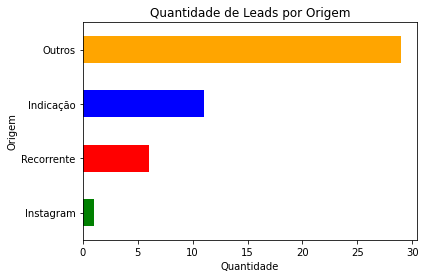

In [51]:
agrupado = dados.groupby(['Origem']).size()
agrupado = agrupado.sort_values()
agrupado.plot.barh(color=['green', 'red', 'blue', 'orange'])
plt.title('Quantidade de Leads por Origem');
plt.xlabel('Quantidade')
plt.ylabel('Origem')

## Temperatura dos Leads
Qual o nível de interesse dos Leads pelos serviços prestados?
- Frio: Pouco Interessado
- Morno: Interesse Médio
- Quente: Muito Interessado

Text(0, 0.5, 'Quantidade')

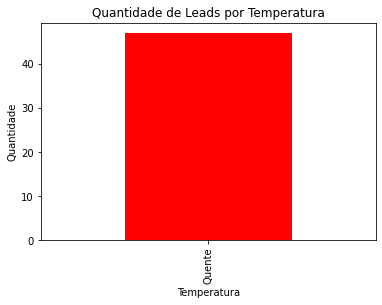

In [45]:
agrupado = dados.groupby(['Temperatura']).size()
agrupado.plot.bar(ylabel = 'Quantidade', color = ['red'])
plt.title('Quantidade de Leads por Temperatura');
plt.xlabel('Temperatura')
plt.ylabel('Quantidade')

Todos os Leads foram classificados como "Quentes". Isso pode ser positivo a partir de uma boa taxa de conversão, ou, novamente os vendedores não estão conseguindo obter e registrar as informações como deveriam.

## Conversão
Quantidade de Leads que fecharam ou não algum tipo de serviço.

Text(0, 0.5, 'Quantidade')

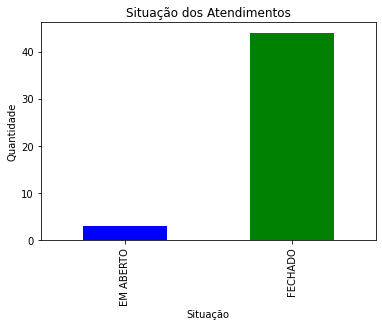

In [44]:
agrupado = dados.groupby(['Situação']).size()
agrupado.plot.bar(ylabel = 'Quantidade', color=['blue', 'green'])
plt.title('Situação dos Atendimentos');
plt.xlabel('Situação')
plt.ylabel('Quantidade')

Existe um volume muito maior de clientes que adquiriram algum tipo de serviço em relação a quantidade de atendimentos, isso pode representar uma ótima taxa de conversão.

## Taxa de Conversão
Percentual de fechamentos sobre a quantidade de atendimentos.

In [99]:
taxa = ((dados.Situação == "FECHADO").sum())/((dados.Situação == "EM ABERTO").sum())

# Conversão para Percentual
"{: .2%}". format(taxa)

' 1466.67%'

Confirmando o resultado do gráfico anterior, podemos ter o entendimento que a empresa está conseguindo fechar com quase todos os seus clientes. Mas para que possamos ter uma clareza maior, é necessário analisar uma maior volume de dados em um maior intervalo de tempo.